# Statistical hypotheses testing

## Exercise 1

Solutions can be found at the end of the [tutorial](05-2_tutorial-cars-solutions.ipynb)

## Exercise 2

> The atheletic team of STU prepares for Universiade. The sprinters' coach tests a new training method. Before he started using it, the runners had the following times in seconds: `12.9, 13.5, 12.8, 15.6, 17.2, 19.2, 12.6, 15.3, 14.4, 11.3`. After the first training with the new method, they had the following times: `12.0, 12.2, 11.2, 13.0, 15.0, 15.8, 12.2, 13.4, 12.9, 11.0`. The coach wants to evaluate, whether the new method helped, i.e., whether the average time is now lower than before.

In [1]:
import numpy as np
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats

%matplotlib inline

In [2]:
before = np.array([12.9, 13.5, 12.8, 15.6, 17.2, 19.2, 12.6, 15.3, 14.4, 11.3])
after = np.array([12.0, 12.2, 11.2, 13.0, 15.0, 15.8, 12.2, 13.4, 12.9, 11.0])

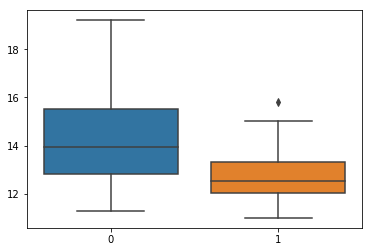

In [3]:
sns.boxplot(data=[before, after])

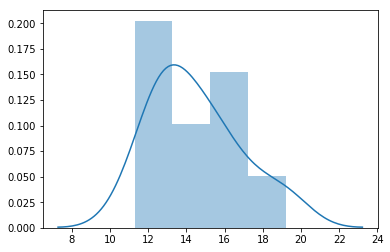

In [4]:
sns.distplot(before)

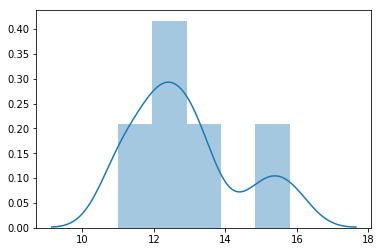

In [5]:
sns.distplot(after)

In [6]:
stats.shapiro(before)

(0.9444354772567749, 0.6033357381820679)

In [7]:
stats.shapiro(after)

(0.9188501238822937, 0.3474642336368561)

In [8]:
stats.levene(before, after)

LeveneResult(statistic=1.5693728596630792, pvalue=0.2263294393121343)

All assumptions are satisfied, therefore, we can use a t-test. Since we have two measurements for each runner, we need to use its paired version.

In [9]:
stats.ttest_rel(before, after)

Ttest_relResult(statistic=5.267141121858618, pvalue=0.0005158220701984934)

We reject the null hypothesis that the two samples have the same means - the coach can rejoice, it seems that his new training method has promising (and statistically significant) results.

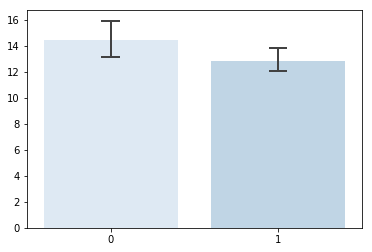

In [10]:
sns.barplot(data=[before, after], capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

## Exercise 3

> A farmaceutical company tests a new medicine to help children with asthma. On a sample of 10 children, they carried out an experiment: 5 randomly selected children used the medicine and 5 others used placebo. During one week, the number of problems with breathing were observed. They got the following measurements: Placebo: `{7, 5, 6, 4, 12}`. The new medicine: `{3, 6, 3, 2, 1}`. Does the new medicine help compared to the placebo?

In [11]:
placebo = np.array([7, 5, 6, 4, 12])
drug = np.array([3, 6, 3, 2, 1])

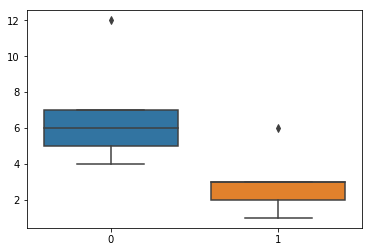

In [12]:
sns.boxplot(data=[placebo, drug])

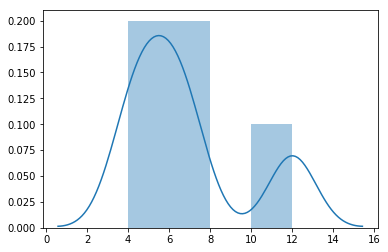

In [13]:
sns.distplot(placebo)

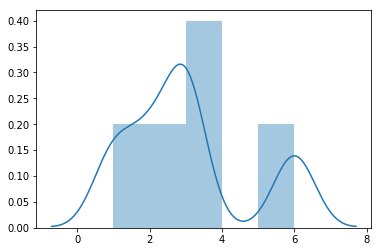

In [14]:
sns.distplot(drug)

In [15]:
stats.shapiro(placebo)

(0.8669608235359192, 0.25433439016342163)

In [16]:
stats.shapiro(drug)

(0.907575786113739, 0.45316019654273987)

In [17]:
stats.levene(placebo, drug)

LeveneResult(statistic=0.44444444444444453, pvalue=0.5237424355470287)

All assumptions are satisfied, therefore, we can use a t-test (although the distributions do not seem normal based on their histograms; if we wanted to play it safe, we could use Mann-Whitney U-test instead). Although we have two sets of measurements, they are not paired (there are different children in the placebo and the drug groups).

In [18]:
stats.ttest_ind(placebo, drug)

Ttest_indResult(statistic=2.338738328607322, pvalue=0.047509168365197404)

We reject the null hypothesis that the two samples have the same means - it seems that the observed difference in breathing problmes are significant. Although, in the real world, a much larger sample would be required to test the hypothesis (we can see in the bar chart below, how wide the confidence intervals are).

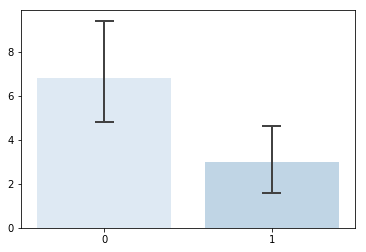

In [19]:
sns.barplot(data=[placebo, drug], capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))